# Postprocessing a FNN Trained for a Mass-Spring-Damper System 

In [1]:
### Loading Libraries

import os
import sys
import numpy                              as np
import pandas                             as pd

import matplotlib
from matplotlib                           import pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from tensorflow                           import keras

import romnet                             as rmnt

In [2]:
### Input Data

ROMNetFldr    = WORKSPACE_PATH + '/ROMNet/romnet/'
#PathToRunFld  = WORKSPACE_PATH + '/ROMNet/0DReact_Isobaric_100Cases_POD_1_Branch/FNN/Deterministic/Run_48/'
PathToRunFld  = WORKSPACE_PATH + '/ROMNet/0DReact_Isobaric_100Cases_POD_1_Branch/FNN_BbB/Deterministic/Run_28/'
#PathToRunFld  = WORKSPACE_PATH + '/ROMNet/MSD_10Cases/FNN/BayesByBackprop/Run_2/'

TrainingCases = [0]#[0,2,4,6,8]
TestCases     = [0,2,4]#[0,2]

NSamples      = 100

Nt            = 100
tout          = np.linspace(0.,15.,Nt)
SOLVER        = 'Radau'

LineTypeVec   = ['-',':','--','.-']*10

In [3]:
print("\n[ROMNet]: Reading Input File from: ", PathToRunFld)
sys.path.insert(0, PathToRunFld)

print("\n[ROMNet]: Keep Loading Modules and Functions...")
from ROMNet_Input import inputdata

print("\n[ROMNet]: Initializing Input ...")
InputData               = inputdata(WORKSPACE_PATH, ROMNetFldr)


InputData.InputFilePath = PathToRunFld+'/ROMNet_Input.py'
InputData.TrainIntFlg   = 0
InputData.PathToRunFld  = PathToRunFld


[ROMNet]: Reading Input File from:  /Users/sventuri/WORKSPACE//ROMNet/0DReact_Isobaric_100Cases_POD_1_Branch/FNN_BbB/Deterministic/Run_28/

[ROMNet]: Keep Loading Modules and Functions...

[ROMNet]: Initializing Input ...


In [4]:
SurrogateType = InputData.SurrogateType
if (SurrogateType == 'FNN-SourceTerms'):
    SurrogateType = 'FNN'

Net   = getattr(rmnt.nn, SurrogateType)

model = rmnt.model.Model_Deterministic(InputData)

model.build(InputData, None, Net)

NN    = model.net


[ROMNet]:   Initializing the ML Model

[ROMNet]:   Building the ML Model


/usr/local/lib/python3.8/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.8/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  untransformed_scale = add_variable_fn(


-2#######################################################################################################################

[ROMNet]:   Loading ML Model Parameters from File:  /Users/sventuri/WORKSPACE//ROMNet/0DReact_Isobaric_100Cases_POD_1_Branch/FNN_BbB/Deterministic/Run_28//Training/Params//000161.h5
'load_params' took 0.058718 s

-1#######################################################################################################################

[ROMNet]:   Saving ML Model Parameters to File:  /Users/sventuri/WORKSPACE//ROMNet/0DReact_Isobaric_100Cases_POD_1_Branch/FNN_BbB/Deterministic/Run_28//Model/Params/Initial.h5
'save_params' took 0.056293 s

'build' took 2.027386 s



iVar =  0


Text(0, 0.5, '$\\Psi_{1}$, Predicted')

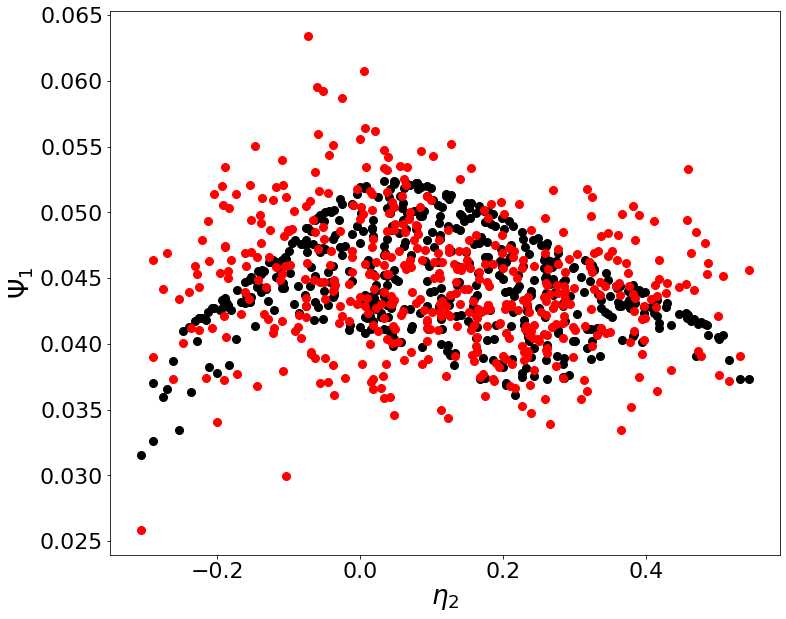

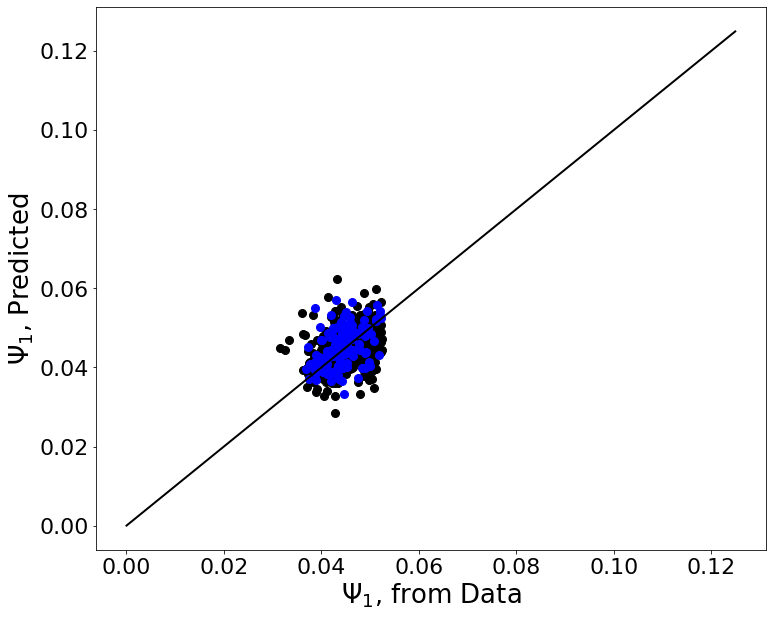

In [5]:
### Evaluating on Test Data

iPC       = 1

VarOI     = 'POD_1'

Vars      = ['POD_'+str(iPOD+1) for iPOD in range(InputData.NPODs)]

FileName   = InputData.PathToDataFld + '/test/ext/Input.csv'# + InputData.InputFile
DataIn     = pd.read_csv(FileName, header=0)
Input      = DataIn.to_numpy()
VarNames   = list(DataIn.columns)

FileName   = InputData.PathToDataFld + '/test/ext/Output.csv'# + InputData.InputFile
Data       = pd.read_csv(FileName, header=0)
Output     = Data.to_numpy()

FileName   = InputData.PathToDataFld + '/train/pts/Input.csv'# + InputData.InputFile
DataIn     = pd.read_csv(FileName, header=0)
InputTrain = DataIn.to_numpy()
VarNames   = list(DataIn.columns)

FileName   = InputData.PathToDataFld + '/train/pts/Output.csv'# + InputData.InputFile
Data       = pd.read_csv(FileName, header=0)
OutputTrain= Data.to_numpy()

FileName   = InputData.PathToDataFld + '/valid/pts/Input.csv'# + InputData.InputFile
DataIn     = pd.read_csv(FileName, header=0)
InputValid = DataIn.to_numpy()
VarNames   = list(DataIn.columns)

FileName   = InputData.PathToDataFld + '/valid/pts/Output.csv'# + InputData.InputFile
Data       = pd.read_csv(FileName, header=0)
OutputValid= Data.to_numpy()

## Variable to Be Visualized
for iVar in range(len(Vars)):
    if (Vars[iVar] == VarOI):
        print('iVar = ', iVar)
        break

        
yMat      = model.predict(Input)    
yMatTrain = model.predict(InputTrain)    
yMatValid = model.predict(InputValid)    

plt.figure(figsize=(12,10))
plt.plot(Input[:,iPC], Output[:,iVar], 'ko')
plt.plot(Input[:,iPC], yMat[:,iVar], 'ro')
# plt.plot(InputTrain[:,iPC], OutputTrain[:,iVar], 'ko')
# plt.plot(InputTrain[:,iPC], yMatTrain[:,iVar], 'ro')
# plt.plot(InputValid[:,iPC], OutputValid[:,iVar], 'bo')
# plt.plot(InputValid[:,iPC], yMatValid[:,iVar], 'go')
plt.xlabel(r'$\eta_{'+str(iPC+1)+'}$')
plt.ylabel(r'$\Psi_{'+str(iVar+1)+'}$')
#plt.xlim([1.e-6,1.e-2])
#plt.legend()
#plt.show()

MinFact = 1.e-3
MaxFact = 2.

plt.figure(figsize=(12,10))
plt.plot(OutputTrain[:,iVar], yMatTrain[:,iVar], 'ko')
plt.plot(OutputValid[:,iVar], yMatValid[:,iVar], 'bo')
plt.plot([yMatTrain[:,iVar].min()*MinFact, yMatTrain[:,iVar].max()*MaxFact],[yMatTrain[:,iVar].min()*MinFact, yMatTrain[:,iVar].max()*MaxFact], 'k-')
plt.xlabel(r'$\Psi_{'+str(iVar+1)+'}$'+', from Data')
plt.ylabel(r'$\Psi_{'+str(iVar+1)+'}$'+', Predicted')
#plt.xlim([yMatTrain[:,iVar].min()*MinFact, yMatTrain[:,iVar].max()*MaxFact])
#plt.ylim([yMatTrain[:,iVar].min()*MinFact, yMatTrain[:,iVar].max()*MaxFact])


In [6]:
%matplotlib qt

iVar    = 30

fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
ax.scatter(Input[:,0], Input[:,1], Output[:,iVar], c='k')
ax.scatter(Input[:,0], Input[:,1], yMat[:,iVar], c='r')
ax.set_xlabel(r'$\eta_{'+str(1)+'}$')
ax.set_ylabel(r'$\eta_{'+str(2)+'}$')
ax.set_zlabel(r'$\Psi_{'+str(iVar+1)+'}$')

Text(0.5, 0, '$\\Psi_{31}$')

In [7]:
print('[PCA]  Max % Error = ', np.max(abs((yMat - Output)/yMat)*100))
print('[PCA]  Max      SE = ', np.max((yMat - Output)**2))
print('[PCA] Mean % Error = ', np.mean(abs((yMat - Output)/yMat)*100))
print('[PCA]          MSE = ', np.mean((yMat - Output)**2))

[PCA]  Max % Error =  573387.5402774173
[PCA]  Max      SE =  0.7332754215121653
[PCA] Mean % Error =  381.20798425102276
[PCA]          MSE =  0.008890885960954643


In [8]:
Data    = pd.read_csv(PathToRunFld+'/Training/History.csv')

# OldRun  = 'Run_39'
# DataOld = pd.read_csv(PathToRunFld+'/../'+OldRun+'/Training/History.csv')

fig  = plt.figure(figsize=(12,8))
plt.plot(Data['tot_loss'],      label='Training')
plt.plot(Data['val_tot_loss'],  label='Validation')
# plt.plot(DataOld['tot_loss'],     label='Training, '+OldRun)
# plt.plot(DataOld['val_tot_loss'], label='Validation, '+OldRun)
plt.xlabel('Epoch')
plt.ylabel('Tot. Loss [MSE]')
plt.legend()
#plt.yscale('log')


fig  = plt.figure(figsize=(12,8))
plt.plot(Data['pts_loss'],      label='Training')
plt.plot(Data['val_pts_loss'],  label='Validation')
# plt.plot(DataOld['pts_loss'],     label='Training, '+OldRun)
# plt.plot(DataOld['val_pts_loss'], label='Validation, '+OldRun)
plt.xlabel('Epoch')
plt.ylabel('Data Loss [MSE]')
plt.legend()
#plt.yscale('log')
#plt.ylim([1.e-2, 1.e0])

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['scs_loss'],     label='Training')
# plt.plot(Data['val_scs_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('S.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['ics_loss'],     label='Training')
# plt.plot(Data['val_ics_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('I.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

In [9]:
# NN.layers[0]._name = 'Trunk_1_Normalization'

# iLVec = [i for i in range(len(NN.layers)) if 'HL' in NN.layers[i].name]
# for jL, iL in enumerate(iLVec):
#     NN.layers[iL]._name              = 'Trunk_1_HL'+str(jL+1)
#     NN.layers[iL].weights[0]._name   = 'Trunk_1_HL'+str(jL+1)+'/kernel:0'
#     NN.layers[iL].weights[1]._name   = 'Trunk_1_HL'+str(jL+1)+'/bias:0'
#     NN.layers[iL].variables[0]._name = 'Trunk_1_HL'+str(jL+1)+'/kernel:0'
#     NN.layers[iL].variables[1]._name = 'Trunk_1_HL'+str(jL+1)+'/bias:0'
    
# [NN.layers[i].name for i in range(len(NN.layers))]

In [10]:
try:
    os.makedirs(InputData.PathToDataFld+'/FNN/')
except:
    pass

NN.save_weights(InputData.PathToDataFld+'/FNN/Final.h5', overwrite=True, save_format='h5')

In [11]:
# NN.save(InputData.PathToDataFld+'/FNN/Model')

In [12]:
import tensorflow as tf

LName   = 'Trunk_1_HL' + str(len(InputData.ActFun[0]))

inputs  = tf.keras.Input(shape=(1,))

Output_ = inputs
for i in range(len(model.net.FNNLayersVecs[0])):
    Layer   = model.net.FNNLayersVecs[0][i]
    Output_ = Layer(Output_)


Branch = keras.Model(inputs=inputs, outputs=Output_)
Branch.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 Trunk_1_Normalization (Cust  (None, 7)                29        
 omNormalization)                                                
                                                                 
 Trunk_1_HL1 (DenseFlipout)  (None, 2)                 32        
                                                                 
 Trunk_1_HL2 (DenseFlipout)  (None, 64)                384       
                                                                 
 Trunk_1_HL3 (DenseFlipout)  (None, 64)                8320      
                                                                 
 Trunk_1_HL4 (DenseFlipout)  (None, 64)                8320      
                                                             

In [13]:
iVar = 63

SigmaVec = tf.math.softplus(0.05 * Branch.predict(Input)[:,64:])

fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
ax.scatter(Input[:,0], Input[:,1], SigmaVec[:,iVar], c='k')
ax.set_xlabel(r'$\eta_{'+str(1)+'}$')
ax.set_ylabel(r'$\eta_{'+str(2)+'}$')
ax.set_zlabel(r'$\Psi_{'+str(iVar+1)+'}$')

Text(0.5, 0, '$\\Psi_{64}$')

In [14]:
iVar = 63

MuVec = Branch.predict(Input)[:,0:64] * model.y_range + model.y_min

fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
ax.scatter(Input[:,0], Input[:,1], Output[:,iVar], c='k')
ax.scatter(Input[:,0], Input[:,1], MuVec[:,iVar],    c='r')
ax.set_xlabel(r'$\eta_{'+str(1)+'}$')
ax.set_ylabel(r'$\eta_{'+str(2)+'}$')
ax.set_zlabel(r'$\Psi_{'+str(iVar+1)+'}$')

Text(0.5, 0, '$\\Psi_{64}$')